<a href="https://colab.research.google.com/github/Alejandro-ZZ/Machine-Learning-UNS/blob/master/TP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1 - Análisis exploratorio**

Se realizará un análisis exploratorio general para concluir qué variables presentan un comportamiento normal o anormal.
<br><br>
La información se toma de dos repositorios con datasets (extraídos de los [datos abiertos y públicos de Bahía Blanca](https://datos.bahia.gob.ar/dataset?groups=covid19)) que contienen información sobre la situación sanitaria y epidemiológica de la municipalidad de Bahía Blanca, Argentina.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Dataset de casos COVID19 - Bahía Blanca**

In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
casos = pd.read_csv(url)
casos

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


Se realiza la gráfica en el tiempo para cada atributo en el dataset.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ea7a53a50>,
      dtype=object)

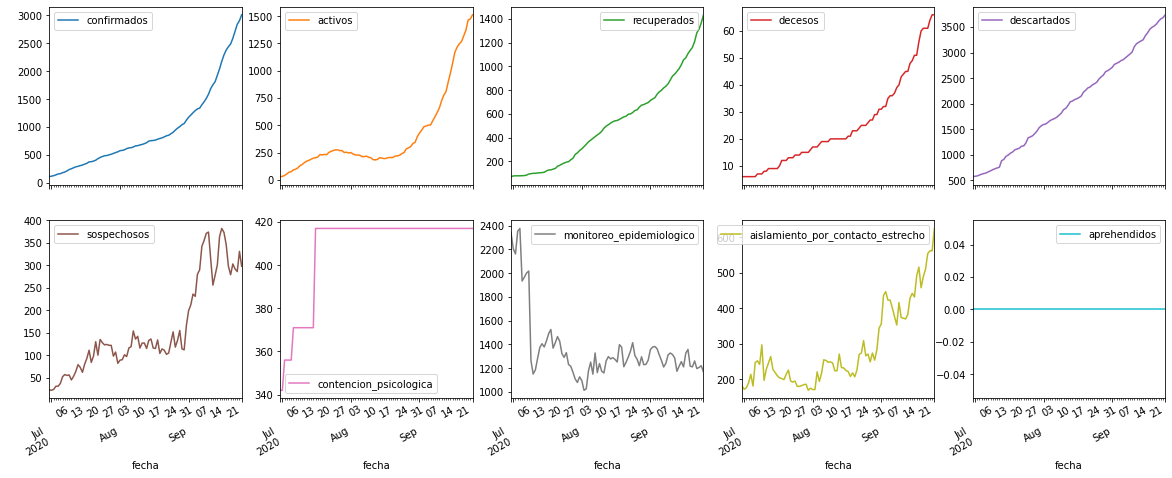

In [ ]:
casos['fecha'] = pd.to_datetime(casos['fecha'])
casos.plot(x = 'fecha', subplots = True, legend = True, figsize = (20, 8), layout = (2, 5))

Se observan los siguientes aspectos:

*   En las primeras cinco gráficas (corfirmados, activos, recuperados, decesos y descartados) se observa la suma acumulada de los casos. Esto se plantea debiado a que su comportamiento es únicamente ascendente. 

*   La variable 'aprehendidos' presenta un valor constante de 0.

*   Los datos en 'contencion_psicologica' presenta un crecimiento hasta alrededor del 16 de Julio, a partir de ahí el valor pasar a ser constante (aproximadamente de 418). Esto puede ser a que la variable no se siguió implementando o no se le dió más seguimiento.






### **Dataset de camas COVID19 - Bahía Blanca**

**UTI** = Unidad de Terapia Intensiva

**UCMA** = Unidad de Cuidados Mínimos Ambulatorios

In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
camas = pd.read_csv(url)
camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ea1ab9650>,
      dtype=object)

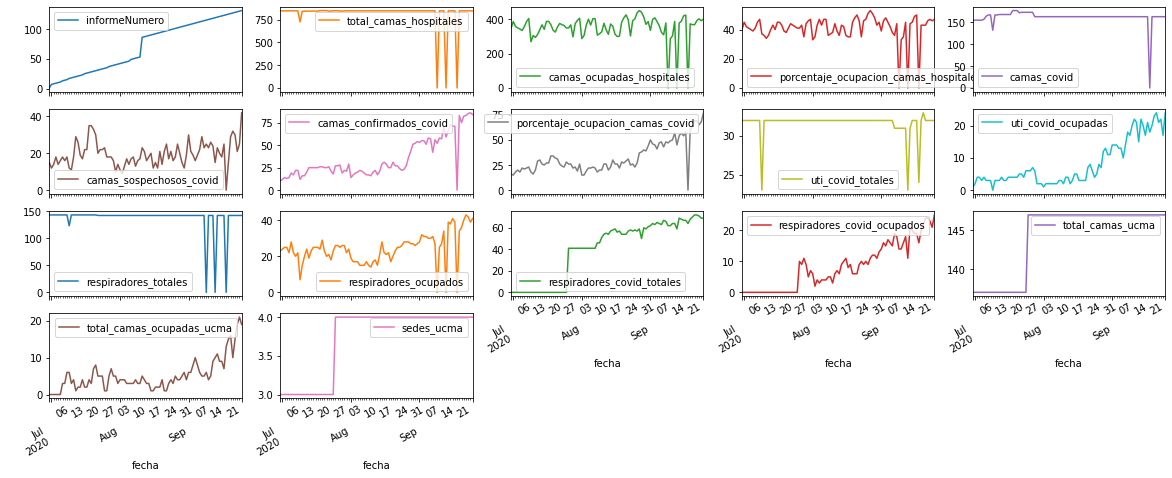

In [ ]:
camas['fecha'] = pd.to_datetime(camas['fecha'])
camas.plot(x = 'fecha', subplots = True, legend = True, figsize = (20, 8), layout = (4, 5))



*   Lo primero que se observa es que la gráfica de 'informeNumero' empieza con un incremento normal, pero al rededor del 10 de Agosto presenta un cambio abrupto en el valor. Esto se puede dar a un retraso en la carga de datos.

*   En algunos gráficos relacionados con los respiradores, camas y Unidad de Terapia Intensiva (UTI), existen días donde su valor es cero. Para un análisis de estos, deberían eliminarse o promediarse.

* En el momento que se habilitan 4 sedes UCMA (a finales de Julio) el valor de las camas totales de las sedes pasa a un valor constante de 147.

* A finales de Julio se empiezan a implementar respiradores para pacientes COVID



# **Ejercicio 2 - Clasificador por mínimo error**

A continuación se realiza un clasificador por mínimo error por medio de la **curva ROC**.
<br><br>
Los datasets se generan con una **distribución Gaussiana** (dado una media y una DS). Se realizarán pruebas modificando los parámetros ($\mu$ y $\sigma$).
<br><br>
La calidad de la clasificación en todos los casos se evalua a partir de los parametros: **precisión, exactitud y F1-score**.

## **Dataset #1**

Se generan dos datasets con diferente media ($\mu$) y desviación estandar ($\sigma$) con una muestra de 50 cada uno (**N=50 c/u**). Estos dos conjuntos se les asignan etiquetas A y B respectivamente.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86430a74d0>]],
      dtype=object)

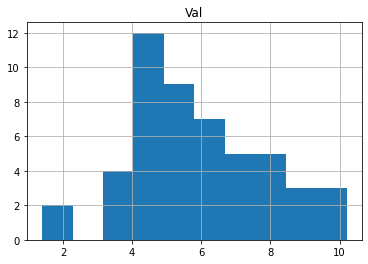

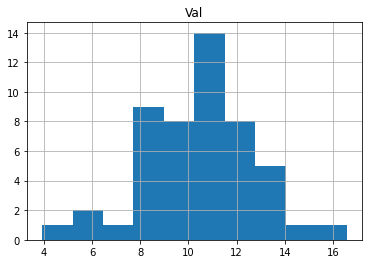

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plt

mu1, sigma1 = 6, 2
mu2, sigma2 = 10, 3
N = 50

np.random.seed(1)
label_A = pd.DataFrame(np.random.normal(loc = mu1, scale = sigma1, size = (N,1)),
                        columns=['Val'])
label_A['Etiq'] = 'A'

label_B = pd.DataFrame(np.random.normal(loc = mu2, scale = sigma2, size = (N,1)),
                        columns=['Val'])
label_B['Etiq'] = 'B'

label_A.hist()
label_B.hist()

Se unen los dos dataset en un solo dataframe y se grafica su distribución


,Val,Etiq
0,16.556726,B
1,14.559450,B
2,13.758604,B
3,13.596754,B
4,13.394888,B
...,...,...
95,3.800217,A
96,3.798762,A
97,3.765379,A
98,1.879719,A


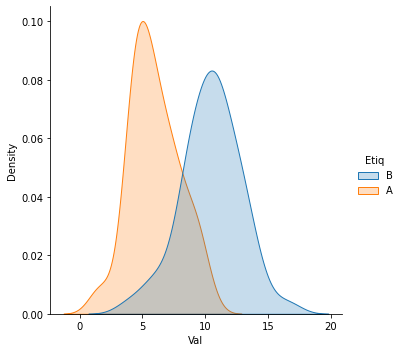

In [ ]:
dataset = pd.concat([label_A, label_B])
dataset = dataset.sort_values(by = 'Val', ascending=False)
dataset = dataset.reset_index().drop('index', axis=1)

sns.displot(data=dataset, x='Val', hue='Etiq', kind='kde', fill=True)
dataset

### **Umbral**

#### 1. Gráfica de la curva ROC. Se asumen como etiqueta TruePositive(TP) como **B** y FalsePositive(FP) como **A**


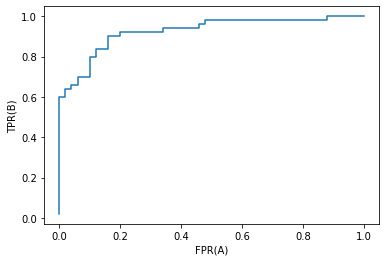

In [ ]:
import matplotlib.pyplot as plt
tpr = []
fpr = []
TP = 0
FP = 0
for row in dataset.itertuples():
  #print(row.Etiq)
  if row.Etiq == 'A':
    FP = FP + 1
  else:
    TP = TP + 1
  tpr.append(TP/N)
  fpr.append(FP/N)

plt.plot(fpr, tpr)
plt.xlabel("FPR(A)")
plt.ylabel("TPR(B)")
plt.show()

#### 2. Línea tangencial a la curva ROC

Se traza una linea de un sistema aleatorio que corte la curva ROC

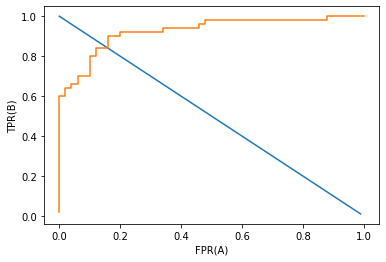

In [ ]:
fpr_thr = np.arange(0.0, 1.0, .01)
tpr_thr = np.arange(1.0, 0.0, -.01)

plt.plot(fpr_thr, tpr_thr)
plt.plot(fpr, tpr)
plt.xlabel("FPR(A)")
plt.ylabel("TPR(B)")

plt.show()  

#### 3. Intersección (umbral de desición)

El punto de intersección definirá el umbral para el cual se obtiene el mínimo error tanto para la TruePositive Rate (TPR) como para la FalsePositive Rate (FPR)

(array('d', [0.1599999999999999]), array('d', [0.84]))

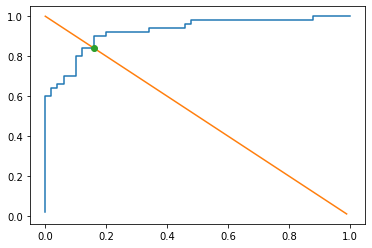

In [ ]:
from shapely.geometry import LineString

plt.plot(fpr, tpr)
plt.plot(fpr_thr, tpr_thr)

# https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
first_line = LineString(np.column_stack((fpr, tpr)))
second_line = LineString(np.column_stack((fpr_thr, tpr_thr)))

intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

intersection.xy

Se obtiene la proporción para el punto encontrado

In [ ]:
# Punto de intersección
umbral_x = round(intersection.xy[0][0], 2)
umbral_y = round(intersection.xy[1][0], 2)

min1 = 1
min2 = 1

umbral_tp = 0
umbral_fp = 0

for i in range(len(tpr)):
  div = i/N
  diff_x = np.abs(div - umbral_x)
  diff_y = np.abs(div - umbral_y)

  if diff_x < min1:
    min1 = diff_x
    umbral_fp = i
  
  if diff_y < min2:
    min2 = diff_y
    umbral_tp = i

print("TPR = {}, es equivalente a: {}/{}".format(umbral_y, umbral_tp, N))
print("FPR = {}, es equivalente a: {}/{}".format(umbral_x, umbral_fp, N))

TPR = 0.84, es equivalente a: 42/50
FPR = 0.16, es equivalente a: 8/50


#### 4. Valor para el umbral

Se busca el valor en la columna "*Val*" del dataset para cuando se cumplen las proporciones mencionadas


In [ ]:
# TruePositive(TP) = B 
# FalsePositive(FP) = A

A_count = 0
B_count = 0
umbral_value = 0
for row in dataset.itertuples():
  if row.Etiq == 'A':
    A_count = A_count + 1
  else:
    B_count = B_count + 1

  if A_count == umbral_fp and B_count == umbral_tp:
    umbral_value = row.Val
    break

print("Para A = {} y B = {}, el valor es {}".format(A_count, B_count, umbral_value))

Para A = 8 y B = 42, el valor es 8.267538884670875


### **Clasificación**
Valores superiores a 8.268 se clasifican como B e inferiores a él se clasifican como A <br><br>
Etiq = A para Val < 8.268<br>
Etiq = B para Val > 8.268

In [ ]:
Etiq_prediccion = []
for row in dataset.itertuples():
  if row.Val > umbral_value:
    Etiq_prediccion.append('B')
  else:
    Etiq_prediccion.append('A')

Se añade la columna de *Etiq predecida*

In [ ]:
dataset['Etiq_prediccion'] = Etiq_prediccion
dataset

,Val,Etiq,Etiq_prediccion
0,16.556726,B,B
1,14.559450,B,B
2,13.758604,B,B
3,13.596754,B,B
4,13.394888,B,B
...,...,...,...
95,3.800217,A,A
96,3.798762,A,A
97,3.765379,A,A
98,1.879719,A,A


### **Evaluación**



#### 1. Confusion matrix

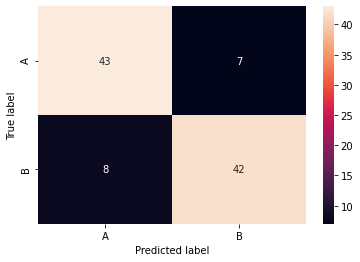

In [ ]:
import matplotlib.pyplot as plt

y_actual = dataset['Etiq']
y_prediccion = dataset['Etiq_prediccion']

confusion_matrix = pd.crosstab(y_actual, y_prediccion, rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### 2. Parámetros de calidad

**Exactitud** = $\frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$
<br><br>
**Precision** = $\frac{\text{TP}}{\text{TP + FP}}$
<br><br>
**Recall** = $\frac{\text{TP}}{\text{TP + FN}}$
<br><br>
**F1-Score** = $\frac{2\text{(Precision)(Recall)}}{\text{Precision + Recall}}$

In [ ]:
# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix.iloc[0]['A']
FN_count = confusion_matrix.iloc[0]['B']
FP_count = confusion_matrix.iloc[1]['A']
TN_count = confusion_matrix.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("F1-Score = " + str(F1_score))

Exactitud = 0.85
Precision = 0.8431372549019608
F1-Score = 0.8514851485148515


#### 3. Reporte con *sklearn*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset['Etiq'], dataset['Etiq_prediccion']))

              precision    recall  f1-score   support

           A       0.84      0.86      0.85        50
           B       0.86      0.84      0.85        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



Dados los parámetros mostrados al generar los datos, el clasificador arroja una **exáctitud y presición del 85%**

## **Dataset #2**

Ahora se modifican las medias ($\mu$) de los dos grupos de datos para que estas se encuentren más cerca. Se mantiene la misma DS ($\sigma$)

,Val,Etiq
0,13.556726,B
1,11.559450,B
2,10.758604,B
3,10.596754,B
4,10.394888,B
...,...,...
95,2.810511,B
96,2.667659,B
97,1.879719,A
98,1.396923,A


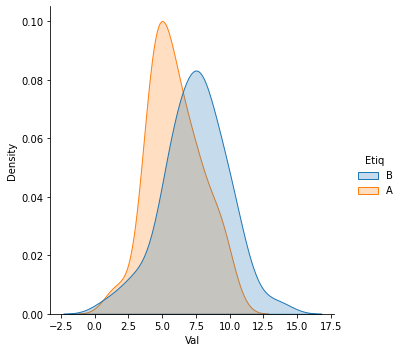

In [ ]:
mu3 = 6
mu4 = 7
N = 50

# Creación de datos
np.random.seed(1)
label2_A = pd.DataFrame(np.random.normal(loc = mu3, scale = sigma1, size = (N,1)),
                        columns=['Val'])
label2_A['Etiq'] = 'A'

label2_B = pd.DataFrame(np.random.normal(loc = mu4, scale = sigma2, size = (N,1)),
                        columns=['Val'])
label2_B['Etiq'] = 'B'

# Union de los datos A y B
dataset2 = pd.concat([label2_A, label2_B])
dataset2 = dataset2.sort_values(by = 'Val', ascending=False)
dataset2 = dataset2.reset_index().drop('index', axis=1)

sns.displot(data=dataset2, x='Val', hue='Etiq', kind='kde', fill=True)
dataset2

### **Umbral**

Se obtiene el punto de intersección para el clasificador

(array('d', [0.35999999999999965]), array('d', [0.64]))

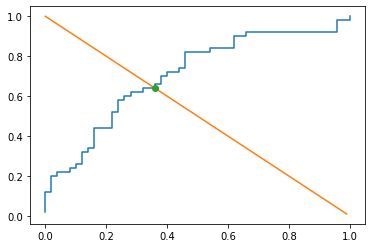

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString

tpr = []
fpr = []
TP = 0
FP = 0

# Datos para la curva ROC
for row in dataset2.itertuples():
  #print(row.Etiq)
  if row.Etiq == 'A':
    FP = FP + 1
  else:
    TP = TP + 1
  tpr.append(TP/N)
  fpr.append(FP/N)

# Linea de 45° para el punto umbral
fpr_thr = np.arange(0.0, 1.0, .01)
tpr_thr = np.arange(1.0, 0.0, -.01)

# Gráfico de la curva ROC y linea de 45°
plt.plot(fpr, tpr)
plt.plot(fpr_thr, tpr_thr)

# Punto de intersección
# https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
first_line = LineString(np.column_stack((fpr, tpr)))
second_line = LineString(np.column_stack((fpr_thr, tpr_thr)))
intersection = first_line.intersection(second_line)
if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

# Coordenadas de intersección
intersection.xy

In [ ]:
# Punto de intersección
umbral_x = round(intersection.xy[0][0], 2)
umbral_y = round(intersection.xy[1][0], 2)

min1 = 1
min2 = 1
umbral_tp = 0
umbral_fp = 0

# Busqueda de la proporción correspondiente al punto de intersección
for i in range(len(tpr)):
  div = i/N
  diff_x = np.abs(div - umbral_x)
  diff_y = np.abs(div - umbral_y)

  if diff_x < min1:
    min1 = diff_x
    umbral_fp = i
  
  if diff_y < min2:
    min2 = diff_y
    umbral_tp = i

print("TPR = {}, es equivalente a: {}/{}".format(umbral_y, umbral_tp, N))
print("FPR = {}, es equivalente a: {}/{}".format(umbral_x, umbral_fp, N))

# Búsqueda del valor 'Val' en el dataset
#     TruePositive(TP) = B 
#     FalsePositive(FP) = A
A_count = 0
B_count = 0
umbral_value = 0
for row in dataset2.itertuples():
  if row.Etiq == 'A':
    A_count = A_count + 1
  else:
    B_count = B_count + 1

  if A_count == umbral_fp and B_count == umbral_tp:
    umbral_value = row.Val
    break

print("Para A = {} y B = {}, el valor es {}".format(A_count, B_count, umbral_value))

TPR = 0.64, es equivalente a: 32/50
FPR = 0.36, es equivalente a: 18/50
Para A = 18 y B = 32, el valor es 6.468831395634185


### **Clasificación**

Etiq = A para Val < 6.469<br>
Etiq = B para Val > 6.469

In [ ]:
# Se clasifica según el umbral encontrado
Etiq_prediccion = []
for row in dataset2.itertuples():
  if row.Val > umbral_value:
    Etiq_prediccion.append('B')
  else:
    Etiq_prediccion.append('A')

# Se añade la predicción al dataset
dataset2['Etiq_prediccion'] = Etiq_prediccion
dataset2

,Val,Etiq,Etiq_prediccion
0,13.556726,B,B
1,11.559450,B,B
2,10.758604,B,B
3,10.596754,B,B
4,10.394888,B,B
...,...,...,...
95,2.810511,B,A
96,2.667659,B,A
97,1.879719,A,A
98,1.396923,A,A


### **Evaluación**

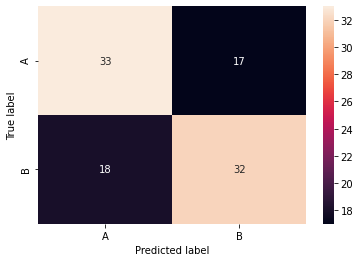


Exactitud = 0.65
Precision = 0.6470588235294118
F1-Score = 0.6534653465346535

              precision    recall  f1-score   support

           A       0.65      0.66      0.65        50
           B       0.65      0.64      0.65        50

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

y_actual = dataset2['Etiq']
y_prediccion = dataset2['Etiq_prediccion']

# Matriz de confusión
confusion_matrix2 = pd.crosstab(y_actual, y_prediccion, rownames=['True label'], colnames=['Predicted label'])
sns.heatmap(confusion_matrix2, annot=True)
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix2.iloc[0]['A']
FN_count = confusion_matrix2.iloc[0]['B']
FP_count = confusion_matrix2.iloc[1]['A']
TN_count = confusion_matrix2.iloc[1]['B']

# Parámetros de calidad
exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

# Resultados
print("\nExactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("F1-Score = " + str(F1_score) + "\n")

# Resumen Sklearn
print(classification_report(dataset2['Etiq'], dataset2['Etiq_prediccion']))

Dados los parámetros mostrados al generar los datos, el clasificador arroja una **exáctitud y presición del 65%**

## **Dataset #3**

Se mantiene la misma media ($\mu$) del dataset #1 y ahora se disminuye la DS ($\sigma$) para los grupos A y B 

,Val,Etiq
0,13.278363,B
1,12.279725,B
2,11.879302,B
3,11.798377,B
4,11.697444,B
...,...,...
95,4.900109,A
96,4.899381,A
97,4.882690,A
98,3.939859,A


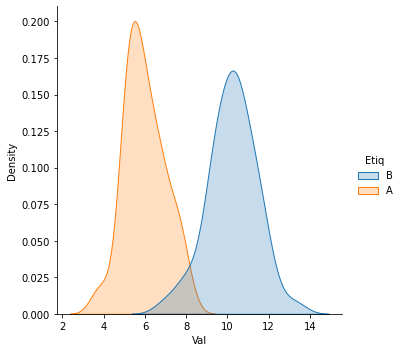

In [ ]:
sigma3 = 1
sigma4 = 1.5
N = 50

# Creación de datos
np.random.seed(1)
label3_A = pd.DataFrame(np.random.normal(loc = mu1, scale = sigma3, size = (N,1)),
                        columns=['Val'])
label3_A['Etiq'] = 'A'

label3_B = pd.DataFrame(np.random.normal(loc = mu2, scale = sigma4, size = (N,1)),
                        columns=['Val'])
label3_B['Etiq'] = 'B'

# Union de los datos A y B
dataset3 = pd.concat([label3_A, label3_B])
dataset3 = dataset3.sort_values(by = 'Val', ascending=False)
dataset3 = dataset3.reset_index().drop('index', axis=1)

sns.displot(data=dataset3, x='Val', hue='Etiq', kind='kde', fill=True)
dataset3

### **Umbral**

TPR = 0.98, es equivalente a: 49/50
FPR = 0.02, es equivalente a: 1/50
Para A = 1 y B = 49, el valor es 7.833829291855616


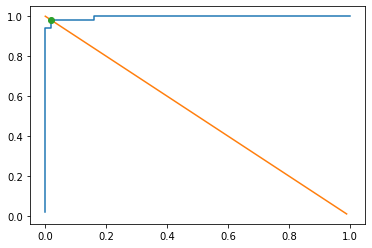

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString

tpr = []
fpr = []
TP = 0
FP = 0

# Datos para la curva ROC
for row in dataset3.itertuples():
  #print(row.Etiq)
  if row.Etiq == 'A':
    FP = FP + 1
  else:
    TP = TP + 1
  tpr.append(TP/N)
  fpr.append(FP/N)

# Linea de 45° para el punto umbral
fpr_thr = np.arange(0.0, 1.0, .01)
tpr_thr = np.arange(1.0, 0.0, -.01)

# Gráfico de la curva ROC y linea de 45°
plt.plot(fpr, tpr)
plt.plot(fpr_thr, tpr_thr)

# Punto de intersección
# https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
first_line = LineString(np.column_stack((fpr, tpr)))
second_line = LineString(np.column_stack((fpr_thr, tpr_thr)))
intersection = first_line.intersection(second_line)
if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

# Coordenadas de intersección
intersection.xy

# Punto de intersección
umbral_x = round(intersection.xy[0][0], 2)
umbral_y = round(intersection.xy[1][0], 2)

min1 = 1
min2 = 1
umbral_tp = 0
umbral_fp = 0

# Busqueda de la proporción correspondiente al punto de intersección
for i in range(len(tpr)):
  div = i/N
  diff_x = np.abs(div - umbral_x)
  diff_y = np.abs(div - umbral_y)

  if diff_x < min1:
    min1 = diff_x
    umbral_fp = i
  
  if diff_y < min2:
    min2 = diff_y
    umbral_tp = i

print("TPR = {}, es equivalente a: {}/{}".format(umbral_y, umbral_tp, N))
print("FPR = {}, es equivalente a: {}/{}".format(umbral_x, umbral_fp, N))

# Búsqueda del valor 'Val' en el dataset
#     TruePositive(TP) = B 
#     FalsePositive(FP) = A
A_count = 0
B_count = 0
umbral_value = 0
for row in dataset3.itertuples():
  if row.Etiq == 'A':
    A_count = A_count + 1
  else:
    B_count = B_count + 1

  if A_count == umbral_fp and B_count == umbral_tp:
    umbral_value = row.Val
    break

print("Para A = {} y B = {}, el valor es {}".format(A_count, B_count, umbral_value))

### **Clasificación y evaluación**

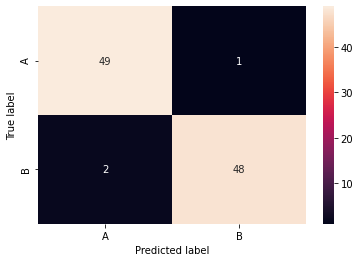


Exactitud = 0.97
Precision = 0.9607843137254902
F1-Score = 0.9702970297029702

              precision    recall  f1-score   support

           A       0.96      0.98      0.97        50
           B       0.98      0.96      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Se clasifica según el umbral encontrado
Etiq_prediccion = []
for row in dataset3.itertuples():
  if row.Val > umbral_value:
    Etiq_prediccion.append('B')
  else:
    Etiq_prediccion.append('A')

# Se añade la predicción al dataset
dataset3['Etiq_prediccion'] = Etiq_prediccion

y_actual = dataset3['Etiq']
y_prediccion = dataset3['Etiq_prediccion']

# Matriz de confusión
confusion_matrix3 = pd.crosstab(y_actual, y_prediccion, rownames=['True label'], colnames=['Predicted label'])
sns.heatmap(confusion_matrix3, annot=True)
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix3.iloc[0]['A']
FN_count = confusion_matrix3.iloc[0]['B']
FP_count = confusion_matrix3.iloc[1]['A']
TN_count = confusion_matrix3.iloc[1]['B']

# Parámetros de calidad
exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

# Resultados
print("\nExactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("F1-Score = " + str(F1_score) + "\n")

# Resumen Sklearn
print(classification_report(dataset3['Etiq'], dataset3['Etiq_prediccion']))

Dados los parámetros mostrados al generar los datos, el clasificador arroja una **exáctitud y presición del 97%**

## **Resumen**

A continuación se presentan las distribuciones de los tres datasets vistos y los resultados del clasificador implementado.

Text(0.5, 1.0, 'Dataset #3, Evaluación = 0.97')

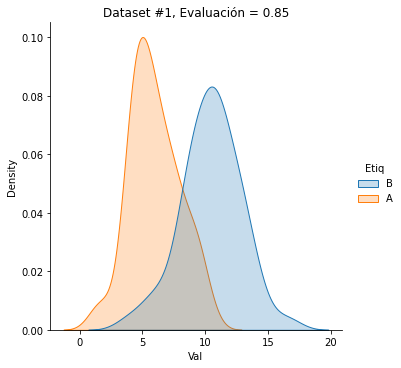

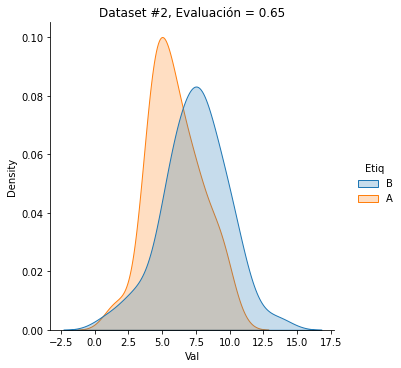

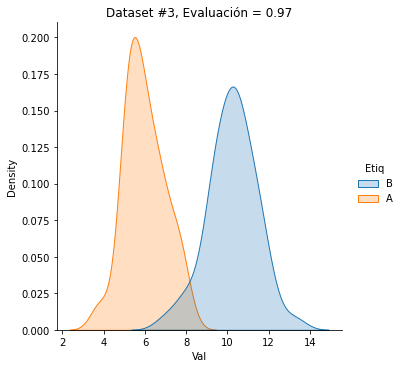

In [ ]:
sns.displot(data=dataset, x='Val', hue='Etiq', kind='kde', fill=True)
plt.title("Dataset #1, Evaluación = 0.85")

sns.displot(data=dataset2, x='Val', hue='Etiq', kind='kde', fill=True)
plt.title("Dataset #2, Evaluación = 0.65")

sns.displot(data=dataset3, x='Val', hue='Etiq', kind='kde', fill=True)
plt.title("Dataset #3, Evaluación = 0.97")

Como se observa, entre mas distantes se encuentres distribuidos los datos, el clasificador presenta un mejor resultado por este método. Esto se debe a que entre menos solapadas las distribuciones, la curva ROC se aleja de la recta aleatoria y por ende es menos complejo distinguir entre las etquetas A y B. 

En este caso, el clasificador se escogió de manera que exista el mínimo error tanto para la tasa de falsos positivos como de verdaderos positivos. Sin embargo, dependiendo de la aplicación y contexto, el umbral se puede extraer de diferentes maneras para atender a una mayor presicion o recall.